# T1 de Data Science - Parte 2

Joyce Araújo - 1213110
Gabriela Bevilacqua - 1511241

Enunciado:
O objetivo deste trabalho é comparar diversos métodos de classificação para a base de dados de qualidade de vinhos disponível em https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv.

Vocês devem encontrar um bom modelo preditivo, variando:
* o número e conjunto de features (atributos) utilizados
* o método utilizado
* a configuração do algoritmo correspondente (e.g.: número k para nearest neighbors, profundidade para árvore de decisão)

Vocês devem listar algumas métricas de qualidade, tais como: precision, recall, accuracy e f1_score, e utilizar accuracy como base para a avaliação final, considerando a accuracy média de 10 iterações para cada configuração.

Para assegurar que eu obterei os mesmos resultados de vocês, vocês devem estabelecer a semente para a geração dos números aleatórios (utilizados para separar os conjuntos de treinamento e teste, por exemplo), utilizando os seguintes comandos no início do seu código (podem utilizar uma outra semente):
```
import random
random.seed(1001001)
```

## Tabela de Vinhos

In [83]:
import pandas as pd

csv_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_raw = pd.read_csv(csv_file, sep=";")
wine_data = pd.DataFrame(wine_raw)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Analisando os dados

In [84]:
wine_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


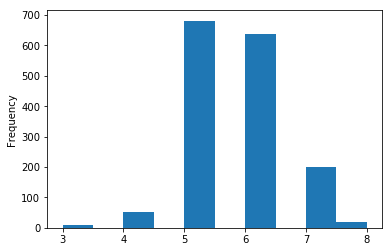

In [5]:
import matplotlib.pyplot as plt
wine_data.quality.plot(kind='hist')
plt.show()

In [86]:
wine_data.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [87]:
wine_data.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

### Informações retiradas da análise
Pela análise é possível ver que a qualidade dos vinhos é classificada sempre em número inteiros enquanto todos os outros parâmetros sobre os vinhos são medidos em valores flutuantes. É possível ver também que alguns parâmetros tem valores bem variados, como o "total sulfur dioxide" cujo valor varia entre 6.0 e 289.0. E outro ponto importante sobre a análise é que, como vamos avaliar a qualidade dos vinhos de acordo com os outros parâmetros do DataFrame, existem muito mais vinhos com classificação 5 e 6 do que 3, 4, 7, 8. Então, é bastante provável que o baixo número de exemplos para os vinhos com classificação 3, 4, 8 principalmente sejam preditos erroneamente.

## Definindo as sementes para geração de números pseudo-aleatórios

In [88]:
import random

# Definir seed utilizada
seed_num = 1001001
seeds_split_train_test = [10, 15, 25, 50, 63, 42, 92, 104, 39, 75]

## Separando as features para medição e para resposta

In [94]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics
import math

# Definir as features de medição
all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
            'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 
            'sulphates', 'alcohol']

# Separando 10 conjuntos de features de medição para os 10 casos de teste
feature_test_1 = ['fixed acidity', 'volatile acidity', 'citric acid']
feature_test_2 = ['residual sugar']
feature_test_3 = ['alcohol', 'density', 'pH']
feature_test_4 = ['free sulfur dioxide', 'total sulfur dioxide']
feature_test_5 = ['chlorides', 'citric acid', 'residual sugar']
feature_test_6 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
feature_test_7 = ['fixed acidity', 'residual sugar', 'alcohol']
feature_test_8 = ['sulphates', 'pH', 'alcohol', 'total sulfur dioxide']
feature_test_9 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'alcohol', 'total sulfur dioxide']
feature_test_10 = ['density', 'pH', 'residual sugar', 'chlorides', 'sulphates', 'alcohol', 'volatile acidity']

features = []
features.append(feature_test_1)
features.append(feature_test_2)
features.append(feature_test_3)
features.append(feature_test_4)
features.append(feature_test_5)
features.append(feature_test_6)
features.append(feature_test_7)
features.append(feature_test_8)
features.append(feature_test_9)
features.append(feature_test_10)

# Definindo a feature de resposta
outcome_column = 'quality'

# Definir todas as possíveis qualidades de vinhos (labels) como resposta
outcome_labels = sorted(list(set(wine_data.quality)))
# print(outcome_labels)

Y = np.array(wine_data[outcome_column])

## Função de separação dos conjuntos de treino e teste

In [95]:
def define_training_test(attributes, seed_number):
    # Separar os conjuntos de treino e teste
    Wine_Train, Wine_Test = train_test_split(wine_data, test_size=0.13, stratify=wine_data[outcome_column], random_state=np.random.seed(seed_number))

    # Converter os conjuntos de treino para array
    X_train = np.array(Wine_Train[attributes])
    Y_train = np.array(Wine_Train[outcome_column])
#     print(X_train.shape[0], Y_train.shape[0])

    # Converter os conjuntos de teste para array
    X_test = np.array(Wine_Test[attributes])
    Y_test = np.array(Wine_Test[outcome_column])
#     print(X_test.shape[0], Y_test.shape[0])

    return X_train, Y_train, X_test, Y_test

## Função para exibir as medidas de precision, recall, F1 score e accuracy de um teste

In [96]:
from sklearn import metrics

_Precision = 1
_Recall = 2
_F1Score = 3
_Accuracy = 4

_AverageOfAllScores = 1 # Calcula a precisão/f1_score/recall de cada label e depois faz a média delas
_OverallScore = 2 # Calcula a precisão/f1_score/recall global
_ScoreByLabel = 3 # Calcula a precisão/f1_score/recall de cada label e retorna elas em um array

def calculateScores(real_group, pred_group, score_type, average_type):
    if(average_type == _AverageOfAllScores):
        chosenAverage = "macro"
    elif(average_type == _OverallScore):
        chosenAverage = "micro"
    elif(average_type == _ScoreByLabel):
        chosenAverage = None
    
    if(score_type == _Precision):
        return metrics.precision_score(y_true=real_group, y_pred=pred_group, average=chosenAverage)
    elif(score_type == _Recall):
        return metrics.recall_score(y_true=real_group, y_pred=pred_group, average=chosenAverage)
    elif(score_type == _F1Score):
        return metrics.f1_score(y_true=real_group, y_pred=pred_group, average=chosenAverage)
    elif(score_type == _Accuracy):
        # Normalizar os dados: Calcula a acur�cia
        # Sem normalizar os dados: Calcula o n�mero total de TP
        return metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
    
    
scores = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

def showScoreResults(score_name, real_group, pred_group):
    if(score_name == scores[0]):
        method = _Precision
    elif(score_name == scores[1]):
        method = _Recall
    elif(score_name == scores[2]):
        method = _F1Score
    elif(score_name == scores[3]):
        method = _Accuracy
        
    if(method == _Precision or method == _Recall or method == _F1Score):
        score = calculateScores(real_group, pred_group, method, _AverageOfAllScores)
        print('Average of all labels' + score_name + ':', '{:6.4f}'.format(score))
        score = calculateScores(real_group, pred_group, method, _OverallScore)
        print('Overall' + score_name + ':', '{:6.4f}'.format(score))
        score = calculateScores(real_group, pred_group, method, _ScoreByLabel)
        print(score_name + ' By Label')
        for label in outcome_labels:
            index = outcome_labels.index(label)
            print('Label: ' + str(label) + '\t' + '{:6.4f}'.format(score[index]))
    elif(method == _Accuracy):
        score = calculateScores(real_group, pred_group, method, 0)
        print(score_name + ':', '{:6.4f}'.format(score))

def showScores_TrainAndTest():
    for score in scores:
        print('\n')
        print('# ' + score)
        print('#')
        print('# Training Data')
        showScoreResults(score, Y_train, Yhat_train)
        print('#')
        print('# Test Data')
        showScoreResults(score, Y_test, Yhat)

## Métodos de Classificação

In [165]:
data = []
columns = ['KNN', 'Naive Bayes', 'Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest']

def measureModel(model):
    accuracy_total = []
    
    for j in range(0, 2):
        if(j == 0):
            attributes = all_features
        for i in range (0, 10):
            if(j == 1):
                attributes = features[i]

            X = np.array(wine_data[attributes])
            X_train, Y_train, X_test, Y_test = define_training_test(attributes, seeds_split_train_test[i])

            #Train the classifier
            model.fit(X_train,Y_train)

            #Compute the prediction according to the model
            Yhat = model.predict(X_test)

            if(i == 0 and j == 1):
                print('Para um dos casos de teste:')
                Yhat_train = model.predict(X_train)
                showScores_TrainAndTest();

            accuracy_total.append(metrics.accuracy_score(y_true=Y_test, y_pred=Yhat, normalize=True))

        accuracy_avg = np.mean(accuracy_total)
    
        if(j == 1):
            print('\nAcuracia media para 10 casos de teste: ' + str(accuracy_avg))
        data.append(accuracy_avg)

### K-Nearest Neighbor (KNN)

In [166]:
#Create an instance of K-nearest neighbor classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=1)

measureModel(knn_model)

Para um dos casos de teste:


# Precision
#
# Training Data
Average of all labelsPrecision: 0.1541
OverallPrecision: 0.3480
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3960
Label: 7	0.1149
Label: 8	0.0000
#
# Test Data
Average of all labelsPrecision: 0.3696
OverallPrecision: 0.6442
Precision By Label
Label: 3	0.0000
Label: 4	0.2000
Label: 5	0.6813
Label: 6	0.6163
Label: 7	0.7200
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 0.1540
OverallRecall: 0.3480
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3946
Label: 7	0.1156
Label: 8	0.0000
#
# Test Data
Average of all labelsRecall: 0.3617
OverallRecall: 0.6442
Recall By Label
Label: 3	0.0000
Label: 4	0.1429
Label: 5	0.6966
Label: 6	0.6386
Label: 7	0.6923
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 0.1541
OverallF1 Score: 0.3480
F1 Score By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3953
Label: 7	0

C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



# Training Data
Accuracy: 0.3480
#
# Test Data
Accuracy: 0.6442

Acuracia media para 10 casos de teste: 0.577163461538


### Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

measureModel(gnb)

Para um dos casos de teste:


# Precision
#
# Training Data
Average of all labelsPrecision: 0.1541
OverallPrecision: 0.3480
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3960
Label: 7	0.1149
Label: 8	0.0000
#
# Test Data
Average of all labelsPrecision: 0.3696
OverallPrecision: 0.6442
Precision By Label
Label: 3	0.0000
Label: 4	0.2000
Label: 5	0.6813
Label: 6	0.6163
Label: 7	0.7200
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 0.1540
OverallRecall: 0.3480
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3946
Label: 7	0.1156
Label: 8	0.0000
#
# Test Data
Average of all labelsRecall: 0.3617
OverallRecall: 0.6442
Recall By Label
Label: 3	0.0000
Label: 4	0.1429
Label: 5	0.6966
Label: 6	0.6386
Label: 7	0.6923
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 0.1541
OverallF1 Score: 0.3480
F1 Score By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3953
Label: 7	0

C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Acuracia media para 10 casos de teste: 0.552163461538


### Decision Tree

In [168]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=np.random.seed(seed_num))

measureModel(clf)

Para um dos casos de teste:


# Precision
#
# Training Data
Average of all labelsPrecision: 0.1541
OverallPrecision: 0.3480
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3960
Label: 7	0.1149
Label: 8	0.0000
#
# Test Data
Average of all labelsPrecision: 0.3696
OverallPrecision: 0.6442
Precision By Label
Label: 3	0.0000
Label: 4	0.2000
Label: 5	0.6813
Label: 6	0.6163
Label: 7	0.7200
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 0.1540
OverallRecall: 0.3480
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3946
Label: 7	0.1156
Label: 8	0.0000
#
# Test Data
Average of all labelsRecall: 0.3617
OverallRecall: 0.6442
Recall By Label
Label: 3	0.0000
Label: 4	0.1429
Label: 5	0.6966
Label: 6	0.6386
Label: 7	0.6923
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 0.1541
OverallF1 Score: 0.3480
F1 Score By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3953
Label: 7	0

C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Acuracia media para 10 casos de teste: 0.611778846154


### Regressão Logística

In [169]:
from sklearn import linear_model

classifier = linear_model.LogisticRegression(random_state=np.random.seed(seed_num))

measureModel(classifier)

Para um dos casos de teste:


# Precision
#
# Training Data
Average of all labelsPrecision: 0.1541
OverallPrecision: 0.3480
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3960
Label: 7	0.1149
Label: 8	0.0000
#
# Test Data
Average of all labelsPrecision: 0.3696
OverallPrecision: 0.6442
Precision By Label
Label: 3	0.0000
Label: 4	0.2000
Label: 5	0.6813
Label: 6	0.6163
Label: 7	0.7200
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 0.1540
OverallRecall: 0.3480
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3946
Label: 7	0.1156
Label: 8	0.0000
#
# Test Data
Average of all labelsRecall: 0.3617
OverallRecall: 0.6442
Recall By Label
Label: 3	0.0000
Label: 4	0.1429
Label: 5	0.6966
Label: 6	0.6386
Label: 7	0.6923
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 0.1541
OverallF1 Score: 0.3480
F1 Score By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3953
Label: 7	0

C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Acuracia media para 10 casos de teste: 0.568269230769


### Support vector machines 

In [170]:
from sklearn import svm

clf = svm.SVC(random_state = np.random.seed(seed_num))

measureModel(clf)

Para um dos casos de teste:


# Precision
#
# Training Data
Average of all labelsPrecision: 0.1541
OverallPrecision: 0.3480
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3960
Label: 7	0.1149
Label: 8	0.0000
#
# Test Data
Average of all labelsPrecision: 0.3696
OverallPrecision: 0.6442
Precision By Label
Label: 3	0.0000
Label: 4	0.2000
Label: 5	0.6813
Label: 6	0.6163
Label: 7	0.7200
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 0.1540


C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


OverallRecall: 0.3480
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3946
Label: 7	0.1156
Label: 8	0.0000
#
# Test Data
Average of all labelsRecall: 0.3617
OverallRecall: 0.6442
Recall By Label
Label: 3	0.0000
Label: 4	0.1429
Label: 5	0.6966
Label: 6	0.6386
Label: 7	0.6923
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 0.1541
OverallF1 Score: 0.3480
F1 Score By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3953
Label: 7	0.1153
Label: 8	0.0000
#
# Test Data
Average of all labelsF1 Score: 0.3648
OverallF1 Score: 0.6442
F1 Score By Label
Label: 3	0.0000
Label: 4	0.1667
Label: 5	0.6889
Label: 6	0.6272
Label: 7	0.7059
Label: 8	0.0000


# Accuracy
#
# Training Data
Accuracy: 0.3480
#
# Test Data
Accuracy: 0.6442

Acuracia media para 10 casos de teste: 0.567788461538


### Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6, random_state=seed_num)

measureModel(clf)

Para um dos casos de teste:


# Precision
#
# Training Data
Average of all labelsPrecision: 0.1541
OverallPrecision: 0.3480
Precision By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3960
Label: 7	0.1149
Label: 8	0.0000
#
# Test Data
Average of all labelsPrecision: 0.3696
OverallPrecision: 0.6442
Precision By Label
Label: 3	0.0000
Label: 4	0.2000
Label: 5	0.6813
Label: 6	0.6163
Label: 7	0.7200
Label: 8	0.0000


# Recall
#
# Training Data
Average of all labelsRecall: 0.1540
OverallRecall: 0.3480
Recall By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3946
Label: 7	0.1156
Label: 8	0.0000
#
# Test Data
Average of all labelsRecall: 0.3617
OverallRecall: 0.6442
Recall By Label
Label: 3	0.0000
Label: 4	0.1429
Label: 5	0.6966
Label: 6	0.6386
Label: 7	0.6923
Label: 8	0.0000


# F1 Score
#
# Training Data
Average of all labelsF1 Score: 0.1541
OverallF1 Score: 0.3480
F1 Score By Label
Label: 3	0.0000
Label: 4	0.0000
Label: 5	0.4139
Label: 6	0.3953
Label: 7	0

C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gabi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Acuracia media para 10 casos de teste: 0.604326923077


### Avaliação dos métodos de classificação

In [172]:
table_data = {}
i = 0
for column in columns:
    table_data[column] = [data[i], data[i + 1]]
    i += 2

table_all_features = pd.DataFrame(data=table_data, columns=columns)
table_all_features

,KNN,Naive Bayes,Decision Tree,Logistic Regression,SVM,Random Forest
0,0.603365,0.593750,0.646154,0.604808,0.596635,0.637500
1,0.577163,0.552163,0.611779,0.568269,0.567788,0.604327


A primeira linha são os resultados de "accuracy" para os métodos de classificação utilizando todos as features possíveis, e a segunda linha são os resultados de "accuracy" mas variando as features utilizadas.
<br>
Claramente para todos os métodos o "accuracy" sem variar as features foi melhor, mas ainda assim ao variar as features não houveram métodos que melhoraram com relação a outros. Os métodos que se destacaram foram a "Decision Tree" e a "Random Forest" apesar dos resultados de "accuracy" terem sido bem próximos.
<br>
Outro ponto a ser avaliado é que, como dito anteriormente na análise dos dados, as métricas (precision, recall e F1 score) apresentaram bons resultados pros vinhos de qualidade 5, 6 e 7 principalmente pois são os que tinham maior número de exemplos no dataset de entrada, enquanto os vinhos de qualidade 3, 4, 8 puxaram essas métricas e o "accuracy" para baixo pois sempre tinham resultados piores devido ao baixo número de exemplos no dataset de entrada.
<br>
O resultado final de "accuracy" dos métodos não foi muito bom ficando entre 0.552163 e 0.637500 mas acredita-se que foi devido ao fato de ter algumas labels com muitos exemplos de entrada e outras com poucos exemplos, sendo essa diferença bem grande. E mesmo utilizando a normalização dos dados para medir o "accuracy" isso não melhorou.

OBS: Os dados foram normalizados somente para medir o "accuracy" dos métodos, não foi feito para todos os dados para avaliar de outra forma as métricas de precision, recall e F1 Score. O motivo é porque o F1 Score consegue obter melhores resultados quando existe esse problema algumas labels com muitos casos e outras com poucos casos.
<br>
OBS2: Alguns "warnings" constam no trabalho pois as métricas trabalham com divisão e em alguns casos ocorreram divisões por 0, o que ocasiona esses "warnings".